<div class="clearfix" style="padding: 10px; padding-left: 0px">
<a href="http://bombora.com"><img src="https://app.box.com/shared/static/e0j9v1xjmubit0inthhgv3llwnoansjp.png" width="200px" class="pull-right" style="display: inline-block; margin: 5px; vertical-align: middle;"></a>
<h1> Bombora Data Science: <br> *Interview Exam* </h1>
</div>

<img width="200px" src="https://app.box.com/shared/static/15slg1mvjd1zldbg3xkj9picjkmhzpa5.png">

---
# Welcome

Welcome! This notebook contains interview exam questions referenced in the *Instructions* section in the `README.md`—please read that first, *before* attempting to answer questions here.

<div class="alert alert-info" role="alert" style="margin: 10px">
<p style="font-weight:bold">ADVICE</p>
<p>*Do not* read these questions, and panic, *before* reading the instructions in `README.md`.</p>
</div>

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p style="font-weight:bold">WARNING</p>

<p>If using <a href="https://try.jupyter.org">try.jupyter.org</a> do not rely on the server for anything you want to last - your server will be <span style="font-weight:bold">deleted after 10 minutes of inactivity</span>. Save often and rember download notebook when you step away (you can always re-upload and start again)!</p>
</div>


## Have fun!

Regardless of outcome, getting to know you is important. Give it your best shot and we'll look forward to following up!

# Exam Questions

## 1. Algo + Data Structures

### Q 1.1: Fibionacci
![fib image](https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/Fibonacci_spiral_34.svg/200px-Fibonacci_spiral_34.svg.png)

#### Q 1.1.1
Given $n$ where $n \in \mathbb{N}$ (i.e., $n$ is an integer and $n > 0$), write a function `fibonacci(n)` that computes the Fibonacci number $F_n$, where $F_n$ is defined by the recurrence relation:

$$ F_n = F_{n-1} + F_{n-2}$$

with initial conditions of:

$$ F_1 = 1,  F_2 = 1$$

In [1]:
def fibonacci(n):
    # making sure that the input is a valid integer
    if not isinstance(n, int) or n < 1:
        raise TypeError("Please input integer greater than or equal to 1!")  
        
    #base case
    if n <= 2:
        return 1
        
    # looking through to compute fibonacci numbers
    prev = 1 #stores the value at i-1, here for 2
    prev_prev = 1 #stores the value at i-2, here for 1
    for i in range(3, n+1):
        res = prev + prev_prev #res stores the value of fib(i)
        prev_prev = prev;
        prev = res
        
    return res

### Unit testing our function
Defining some test cases for our function. We explicitly test for
+ The function returns the base case values currently
+ The function raises an exception when the input is illegal
+ The function returns the correct fibonacci number when the input is legal. 

In [2]:
#use dictionary to define the test cases. Key is the input and value is the expected output

excemption_inputs = [-10, -1, 0]
base_test = {1:1, 2:1}
generic_test = {4: 3, 5:5, 7:13, 10: 55, 13:233}

In [3]:
# for x in excemption_inputs:
#     fibonacci(x)
    
    
#it raises an error. If use unittest package from Python we can check for this automatically. 
#But it's difficult to use with notebook

In [4]:
def check_if_passes(func, test):
    for x in test.keys():
        assert(func(x) == test[x])
        
    print('All passed ok!')

In [5]:
check_if_passes(fibonacci, base_test)

All passed ok!


In [6]:
check_if_passes(fibonacci, generic_test)

All passed ok!


#### Q 1.1.2
What's the complexity of your implementation?

---

The time complexity of this bottom up methods is $O(n)$, as the implementation visit all `i` from 3 to n once. Our current implement has a constant space complexity $O(1)$. If we had stored an array of all the previous fibonacci numbers instead, the complexity would have been $O(n)$ as we need an array of length n to store all those numbers. 

#### Q 1.1.3
Consider an alternative implementation to compute Fibonacci number $F_n$ and write a new function, `fibonacci2(n)`.

**Solution**: We provide two different **recursive** solutions below since our implementaiton in 1.1.1 was using dynamic programming/loop. 

#### Naive Recursion

In [7]:
def fibonacci2_naive(n):
    # making sure that the input is a valid integer
    if not isinstance(n, int) or n < 1:
        raise TypeError("Please input integer greater than or equal to 1!")  
        
    #base case
    if n <= 2:
        return 1
    
    return fibonacci2_naive(n-1) + fibonacci2_naive(n-2)

In [8]:
check_if_passes(fibonacci2_naive, base_test)

All passed ok!


In [9]:
check_if_passes(fibonacci2_naive, generic_test)

All passed ok!


This implementation is very inefficient in time (and recursion stack space as explained below in 1.1.4). We provide an optimized recursive implementation by using a hashmap to reduce the computation time. 

#### Optimized Recursion

In [10]:
fib_lookup = {1:1, 2:1}

def fibonacci2_opt(n):
    # making sure that the input is a valid integer
    if not isinstance(n, int) or n < 1:
        raise TypeError("Please input integer greater than or equal to 1!")  
        
    if n not in fib_lookup:
        fibn = fibonacci2_opt(n-1) + fibonacci2_opt(n-2)
        fib_lookup[n] = fibn
        
    
    return fib_lookup[n]

In [11]:
check_if_passes(fibonacci2_opt, base_test)

All passed ok!


In [12]:
check_if_passes(fibonacci2_opt, generic_test)

All passed ok!


#### Q 1.1.4
What's the complexity of your implementation?

**Naive Recursion** : For the naive recursion, to compute $F(n)$ we branch out and have to construct a whole tree with $2^n$ elements. The **time complexity** for this will be **exponential** at $O(2^n)$.  We don't use any additional varibles - so in that sense we have a **constant space complexity**. However, we **use $O(n)$ memory in the recursion stack**. To compute $F(n)$ we call $F(n-1)$, $F(n-2)$ and so on and the recursion stack has to remember this. 

**Optimized Recursion**: The time complexity of this optimized is $O(n)$ as we avoid recomputation (similar to solution in 1.1). An essential ingredient of achieving linear time complexity is using a hashmap or dictionary to store the lookup table. Hashmap allows us to search for the element and access it in constant time. However, the use of Hasmap requires space making our method have $O(n)$ space complexity. 

#### Q 1.1.5
What are some examples of optimizations that could improve computational performance?


**Solution**: An optimization I haven't discussed in solution 1.1.1 or 1.1.4 is using the **closed form expression** directly:

$$F_n = \frac{\varphi^n-\psi^n}{\sqrt 5}$$ where golden ratio $\psi$ is defined as 
$$\psi = \frac{1 - \sqrt{5}}{2}$$

This closed form expression gives us answer in essentially constant time with no additonal space complexity. If we consider the time required to do the exponential in the formula, we take $O(logn)$ to compute $F_n$ as as number to the power $n$ can be computed in $logn$ time. 

Summarizing some optimization strategies I have already discussed in 1.1.1 and 1.1.3:

+ We see that the naive recursive solution has exponential time complexity and we optimized the time complexity to linear time by using a hashmap to memorize the already computed values (1.1.3 and 1.1.4). 

+ We provided a linear time dynamic programming based algorithm in 1.1 which is an improvement over naive recursion. A naive bottoms up implementation of DP would require $O(n)$ space complexity to store an array of all the Fibonacci numbers computed. However, we optimized space by realizing that the recursing relation only depends on the previous two time steps thereby requiring only constant space. 




### Q 1.2: Linked List
![ll img](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6d/Singly-linked-list.svg/500px-Singly-linked-list.svg.png)

#### Q 1.2.1
Consider a [singly linked list](https://en.wikipedia.org/wiki/Linked_list), $L$. Write a function `is_palindrome(L)` that detects if $L$ is a [palindrome](https://en.wikipedia.org/wiki/Palindrome), by returning a bool, `True` or `False`.


#### Q 1.2.2
What is the complexity of your implementation?

#### Q 1.2.3
Consider an alternative implementation to detect if L is a palindrome and write a new function, `is_palindrome2(L)`.

#### Q 1.2.4
What's the complexity of this implementation?


#### Q 1.2.5 
What are some examples of optimizations that could improve computational performance?


## 2. Prob + Stats

### Q 2.1: Finding $\pi$ in a random uniform?
<img src=https://www.epicurus.com/food/recipes/wp-content/uploads/2015/03/Pi-Day.jpg width="480">

Given a uniform random generator $[0,1)$ (e.g., use your language's standard libary to generate random value), write a a function `compute_pi` to compute [$\pi$](https://en.wikipedia.org/wiki/Pi).

**Solution**: If we generate random numbers $(x, y)$ where both are distribution uniformly in $[0, 1)$ space, then are equally probable for fall anywhere in the area enclosed within $(0, 0)$ and $(1, 1)$ uniformly. If we consider the intersection of a unit cirlce with this area, it is a quarter cirlce with the area of intersection being $\frac{\pi}{4}$. Let $N$ be the total number of random points we generate in the  area within $(0, 0)$ and $(1, 1)$ and let $M$ be the number of points that fall into this quarter circle. Then we know that
$$ \frac{M}{N} = \frac{\pi}{4} $$

Therefore, 
$$ \hat{\pi} = \frac{4M}{N} $$


This is a monte-carlo way of estimating the value of $\pi$. Our approximation for $\pi$ gets better as the number of points we generate $N$ increases. 

In [13]:
import numpy as np

def estimate_pi(N):
    random_points = np.random.uniform(size = [2, N])
    norm_of_points = np.linalg.norm(random_points, axis = 0)
    
    #if the norm of a point is less than 1, that means that it is within the quarter circle
    
    M = np.sum(norm_of_points < 1) #number of points within the quarter circle
    
    return (4*M)/N

Let's check the peformance of our method with increasing value of $N$. We expect our method to produce better estimates (ie more accurate measurement of $\pi$ and lower variance) with increasing value of $N$. Let's run the estimate 25 times for each N to find look at the variance

In [14]:
N_array = [10, 50, 10**2, 10**3, 10**4]
n_runs = 25

In [15]:
result_with_N = {}

for N in N_array:
    result_with_N[N] = [estimate_pi(N) for _ in range(n_runs)]

In [16]:
import matplotlib.pyplot as plt

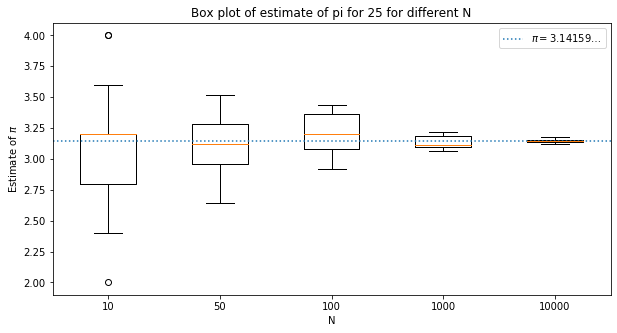

In [17]:
plt.figure(figsize = (10, 5))
_ = plt.boxplot(result_with_N.values())
_ = plt.axhline(y = np.pi, linestyle = 'dotted', label = '$\pi = 3.14159 \dots$')
_ = plt.xticks(range(1, len(N_array)+1), N_array)

_ = plt.title(f'Box plot of estimate of pi for {n_runs} for different N')
_ = plt.xlabel('N')
_ = plt.ylabel('Estimate of $\pi$')
_ = plt.legend()

As we expected, we see that our estimates gets better with increasing value of $N$. We can also see this by plotting the error (MSE between estimated and real value of $\pi$) with $N$ but this can also be inferred from our box plot above. 

To make our method better, for the future, we can also provde **confidence interval** on our estimate of $\pi$ (reasonable when N is large). 

### Q 2.2: Making a 6-side die roll a 7?

Using a single 6-side die, how can you generate a random number between 1 - 7?

### Q 2.3: Is normality uniform?

<img src=https://rednaxela1618.files.wordpress.com/2014/06/uniformnormal.png width="480">


Given draws from a normal distribution with known parameters, how can you simulate draws from a uniform distribution?

### Q 2.4: Should you pay or should you go?

![coin flip](https://lh5.ggpht.com/iwD6MnHeHVAXNBgrO7r4N9MQxxYi6wT9vb0Mqu905zTnNlBciONAA98BqafyjzC06Q=w300)

Let’s say we play a game where I keep flipping a coin until I get heads. If the first time I get heads is on the nth coin, then I pay you $2^{(n-1)}$ US dollars. How much would you pay me to play this game? Explain.

### Q 2.5: Uber vs. Lyft

![uber vs lyft](http://usiaffinity.typepad.com/.a/6a01347fc1cb08970c01bb0876bcbe970d-pi)

You request 2 UberX’s and 3 Lyfts. If the time that each takes to reach you is IID, what is the probability that all the Lyfts arrive first? What is the probability that all the UberX’s arrive first?

### Q 2.6: Pick your prize
<img src=https://miro.medium.com/max/1100/1*m5b3O9sE68UCXjLw5oxy2g.png width="480">

A prize is placed at random behind one of three doors and you are asked to pick a door. To be concrete, say you always pick door 1. Now the game host chooses one of door 2 or 3, opens it and shows you that it is empty. They then give you the option to keep your picked door or switch to the unopened door. Should you stay or switch if you want to maximize your probability of winning the prize?

**Solution**: We want to switch. The probability of winning by switching is 2/3.

Let's assume the host open door 3 and it's empty. Then the event of me win by switching will be the prize is in door 2 conditioned on the host open the door 3. 

$$P(\text{win by switching}) = P(\text{price in door 2 | host open empty door 3} = \frac{P(\text{price in door 2 and open empty door 3})}{P(\text{host open empty door 3})} ) $$


$$P(\text{open empty door 3}) = P(\text{price in door 1 and open empty door 3}) + P(\text{price in door 2 and open empty door 3}) = 1/3 * 1/2 + 1/3 * 1 = 1/2 $$
$$P(\text{price in door 2 and open empty door 3}) = 1/3 * 1 = 1/3 $$

Then $$P(\text{win by switching}) = P(\text{price in door 2 | host open empty door 3}) = 2/3 $$






## 3 Conceptual ML


### Q 3.1 Why study gradient boosting or neural networks?

Consider a regression setting where $X \in \mathbb{R}^p$ and $Y \in \mathbb{R}$. The goal is to come up with a function $f(X): \mathbb{R}^p \rightarrow \mathbb{R}$ that minimizes the squared-error loss $(Y - f(X))^2$. Since X, Y are random variables, we seek to minimize the expectation of the squared error loss as follows
\begin{equation}
EPE(f) = \mathbb{E}\left[(Y-f(X)^2\right]
\end{equation}
where EPE stands for expected prediction error. One can show that minimizing the expected prediction error leads to the following _regression function_
\begin{equation}
f(x) = \mathbb{E}\left[Y|X=x\right]
\end{equation}

The goal of any method is to approximate the regression function above, which we denote as $\hat{f}(x)$. For example, linear regression explicitly assumes that the regression function is approximately linear in its arguments, i.e. $\hat{f}(x) = x^T\beta$ while a neural network provides a nonlinear approximation of the regression function. 

The simplest of all these methods is [k-nearest neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm). Given $x$ and some neighbourhood of $k$ points $N_k(x)$, $\hat{f}(x)$ is simply the average of all $y_i|x_i \in N_k(x)$.  Let $N$ denote the training sample size. Under mild regularity conditions on the joint probability distribution $Pr(X, Y)$, one can show that as $N \rightarrow \infty$, $k \rightarrow \infty$ such that $k/N \rightarrow 0$, then $\hat{f}(x) \rightarrow f(x)$ where $\rightarrow$ means approaches or goes to. In other words, the k-nearest neighbors algorithm converges to the ideal solution as both the training sample size and number of neighbors increase to infinity.

Now given this _universal approximator_, why look any further and research other methods? Please share your thoughts.


**Solution**: The primary reason why this universal approximator cannot work in practise is the **curse of dimensionality**.

If we consider the euclidean distance to the closet k points for a given point, this will go up (exponentially) with increasing dimension. Now, a typicaly top-1 closest point will be much farther away from the point under consideration in high dimensions and therefore the estimate we get from the y value corresponding to this point will not be good. 

### Q 3.2 Model Selection and Assesment

Consider a multiclass classification problem with a large number of features $p >> N$, for e.g $p=10000, N=100$ The task is threefold
1. Find a "good" subset of features that show strong _univariate_ correlation with class labels
2. Using the "good" subset, build a multi class classifier
3. Estimate the generalization error of the final model

Given this dataset, outline your approach and please be sure to cover the following
- Data splitting
- Model Selection: either estimating the performance of different classifiers or the same classifier with different hyperparameters
- Model Assessment: having chosen a classifier, estimating the generalization error

Assume all features are numerical, the dataset contains no NULLS, outliers, etc. and doesn't require any preprocessing.



**Solution**: We can use k-fold cross validation to estimate the gererallization error of the final model. The process is listed as follows:
1. Divide the whole data $D$ in to K groups at random.
2. For each fold $i =1, ..., K$:
      
    2.1 Use all the data except those in fold $i$, noted as $D_{ci}$, to find a "good" subset, $S_i$, of features that show strong univariate correlation with class labels.
    Specifically speaking, strong univariate correlation is calculated by the correlation of the one-vs-all class labels.
    
    2.2 Use features in $S_i$ to build a multiclass classifier, train the classifier with $D_{ci}$.
    
    2.3 Use the classifier to predict data in fold $i$, and get estimated error $e_i$.
    
3. The estimated generalization error of the final model is $\sum_{i=1}^K e_i$
